# CSI5155 Machine Learning Assignment 1

This notebook is only for evaluating models from an existing machine learning pipeline.

## Installing Prerequisites and Dependencies

In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install joblib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd;
import numpy as np;
from models import Models;
import constants;
from fileOrganizer import unpack;
import joblib; # for saving Python objects (like models) in .pkl format
import performance;

## Obtain Models and Data from files

### Unpacking Model files

In [3]:
# choc dataset
choco_decisionTree = unpack(constants.filepaths["choc_posttrained_decisionTree"]);
choco_gradientBoost = unpack(constants.filepaths["choc_posttrained_gradientBoost"]);
choco_KNN = unpack(constants.filepaths["choc_posttrained_KNN"]);
choco_MLP = unpack(constants.filepaths["choc_posttrained_MLP"]);
choco_randomForst = unpack(constants.filepaths["choc_posttrained_randomForest"]);
choco_SVC = unpack(constants.filepaths["choc_posttrained_SVC"]);

# mushrooms dataset
mushrooms_decisionTree = unpack(constants.filepaths["mushrooms_posttrained_decisionTree"]);
mushrooms_gradientBoost = unpack(constants.filepaths["mushrooms_posttrained_gradientBoost"]);
mushrooms_KNN = unpack(constants.filepaths["mushrooms_posttrained_KNN"]);
mushrooms_MLP = unpack(constants.filepaths["mushrooms_posttrained_MLP"]);
mushrooms_randomForest = unpack(constants.filepaths["mushrooms_posttrained_randomForest"]);
mushrooms_SVC = unpack(constants.filepaths["mushrooms_posttrained_SVC"]);

In [4]:
# Verify data
print(f"Decision Tree classifier - for Chocolate dataset: {choco_decisionTree}");
print(f"Decision Tree classifier - for Mushrooms dataset: {mushrooms_decisionTree}");
print(f"Gradient Boosting classifier - for Chocolate dataset: {choco_gradientBoost}");
print(f"Gradient Boosting classifier - for Mushrooms dataset: {mushrooms_gradientBoost}");
print(f"KNN classifier - for Chocolate dataset: {choco_KNN}");
print(f"KNN classifier - for Mushrooms dataset: {mushrooms_KNN}");
print(f"MLP classifier - for Chocolate dataset: {choco_MLP}");
print(f"MLP classifier - for Mushrooms dataset: {mushrooms_MLP}");
print(f"Random Forest classifier - for Chocolate dataset: {choco_randomForst}");
print(f"Random Forest classifier - for Mushrooms dataset: {mushrooms_randomForest}");
print(f"SVM classifier - for Chocolate dataset: {choco_SVC}");
print(f"SVM classifier - for Mushrooms dataset: {mushrooms_SVC}");


Decision Tree classifier - for Chocolate dataset: DecisionTreeClassifier(criterion='entropy', splitter='random')
Decision Tree classifier - for Mushrooms dataset: DecisionTreeClassifier(criterion='entropy', splitter='random')
Gradient Boosting classifier - for Chocolate dataset: GradientBoostingClassifier()
Gradient Boosting classifier - for Mushrooms dataset: GradientBoostingClassifier()
KNN classifier - for Chocolate dataset: KNeighborsClassifier(n_jobs=-1, weights='distance')
KNN classifier - for Mushrooms dataset: KNeighborsClassifier(n_jobs=-1, weights='distance')
MLP classifier - for Chocolate dataset: MLPClassifier(hidden_layer_sizes=3769, learning_rate='adaptive', max_iter=500)
MLP classifier - for Mushrooms dataset: MLPClassifier(hidden_layer_sizes=3769, learning_rate='adaptive', max_iter=500)
Random Forest classifier - for Chocolate dataset: RandomForestClassifier(criterion='entropy')
Random Forest classifier - for Mushrooms dataset: RandomForestClassifier(criterion='entropy'

### Unpacking Test Set data

In [5]:
# choc dataset
choco_X_test = unpack(constants.filepaths["choc_test-set_samples"]);
choco_y_test = unpack(constants.filepaths["choc_test-set_labels"]);

# mushrooms dataset
mushrooms_X_test = unpack(constants.filepaths["mushrooms_test-set_samples"]);
mushrooms_y_test = unpack(constants.filepaths["mushrooms_test-set_labels"]);

Verifying the data

In [6]:
# choc dataset
# Samples Array
print(f"Type of samples array - for Chocolate dataset: {type(choco_X_test)}");
print(f"Shape of samples array - for Chocolate dataset: {choco_X_test.shape}");
print(f"Dimensionality of samples array - for Chocolate dataset: {choco_X_test.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(choco_y_test)}");
print(f"Shape of labels array - for Chocolate dataset: {choco_y_test.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {choco_y_test.ndim}");

print();

# mushrooms dataset
# Samples array
print(f"Type of samples array - for Mushrooms dataset: {type(mushrooms_X_test)}");
print(f"Shape of samples array - for Mushrooms dataset: {mushrooms_X_test.shape}");
print(f"Dimensionality of samples array - for Mushrooms dataset: {mushrooms_X_test.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(mushrooms_y_test)}");
print(f"Shape of labels array - for Chocolate dataset: {mushrooms_y_test.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {mushrooms_y_test.ndim}");

Type of samples array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of samples array - for Chocolate dataset: (629, 13)
Dimensionality of samples array - for Chocolate dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (629,)
Dimensionality of labels array - for Chocolate dataset: 1

Type of samples array - for Mushrooms dataset: <class 'numpy.ndarray'>
Shape of samples array - for Mushrooms dataset: (629, 13)
Dimensionality of samples array - for Mushrooms dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (629,)
Dimensionality of labels array - for Chocolate dataset: 1


### Unpacking Training Set data

In [7]:
# choc dataset
choco_X_train = unpack(constants.filepaths["choc_train-set_samples"]);
choco_y_train = unpack(constants.filepaths["choc_train-set_labels"]);

# mushrooms dataset
mushrooms_X_train = unpack(constants.filepaths["mushrooms_train-set_samples"]);
mushrooms_y_train = unpack(constants.filepaths["mushrooms_train-set_labels"]);

In [8]:
# choc dataset
# Samples Array
print(f"Type of samples array - for Chocolate dataset: {type(choco_X_train)}");
print(f"Shape of samples array - for Chocolate dataset: {choco_X_train.shape}");
print(f"Dimensionality of samples array - for Chocolate dataset: {choco_X_train.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(choco_y_train)}");
print(f"Shape of labels array - for Chocolate dataset: {choco_y_train.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {choco_y_train.ndim}");

print();

# mushrooms dataset
# Samples array
print(f"Type of samples array - for Mushrooms dataset: {type(mushrooms_X_train)}");
print(f"Shape of samples array - for Mushrooms dataset: {mushrooms_X_train.shape}");
print(f"Dimensionality of samples array - for Mushrooms dataset: {mushrooms_X_train.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(mushrooms_y_train)}");
print(f"Shape of labels array - for Chocolate dataset: {mushrooms_y_train.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {mushrooms_y_train.ndim}");

Type of samples array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of samples array - for Chocolate dataset: (1256, 13)
Dimensionality of samples array - for Chocolate dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (1256,)
Dimensionality of labels array - for Chocolate dataset: 1

Type of samples array - for Mushrooms dataset: <class 'numpy.ndarray'>
Shape of samples array - for Mushrooms dataset: (1256, 13)
Dimensionality of samples array - for Mushrooms dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (1256,)
Dimensionality of labels array - for Chocolate dataset: 1


In [9]:
# Combine all models into a pipeline for both datasets respectively
# choc dataset
chocoModels = Models(
    decisionTree_clf=choco_decisionTree,
    randomForest_clf=choco_randomForst,
    svm_clf=choco_SVC,
    gradientBoost_clf=choco_gradientBoost,
    mlp_clf=choco_MLP,
    knn_clf=choco_KNN
);

chocoModels.set_X_train(choco_X_train);
chocoModels.set_X_test(choco_X_test);
chocoModels.set_y_train(choco_y_train);
chocoModels.set_y_test(choco_y_test);

# Normalize
chocoModels.normalize();

chocoModels.getModels(
    constants.descisionTree, # Single Decision Tree classifier
    constants.randForest, # Random Forest classifier
    constants.svm, # Support Vector Machine (SVM) classifier - SVC with RBF
    constants.gradientBoost, # gradient boosting (GB) ensemble
    constants.mlp, # multi-layer perceptron (MLP) classifier
    constants.knn # k‐nearest neighbour (k-NN) classifier
);
print(chocoModels);

In [10]:
# Combine all models into a pipeline for both datasets respectively
# choc dataset
mushModels = Models(
    decisionTree_clf=mushrooms_decisionTree,
    randomForest_clf=mushrooms_randomForest,
    svm_clf=mushrooms_SVC,
    gradientBoost_clf=mushrooms_gradientBoost,
    mlp_clf=mushrooms_MLP,
    knn_clf=mushrooms_KNN
);

mushModels.set_X_train(choco_X_train);
mushModels.set_X_test(choco_X_test);
mushModels.set_y_train(choco_y_train);
mushModels.set_y_test(choco_y_test);

# Normalize 
mushModels.normalize();

mushModels.getModels(
    constants.descisionTree, # Single Decision Tree classifier
    constants.randForest, # Random Forest classifier
    constants.svm, # Support Vector Machine (SVM) classifier - SVC with RBF
    constants.gradientBoost, # gradient boosting (GB) ensemble
    constants.mlp, # multi-layer perceptron (MLP) classifier
    constants.knn # k‐nearest neighbour (k-NN) classifier
);
print(mushModels);

## Evaluating Performance Metrics from test set

### Decision Tree classifier

In [11]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_decisionTree:np.ndarray = Models.predict(
    model=chocoModels.decisionTree_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_decisionTree = performance.evalPredictionNum(
    y_pred=choc_y_pred_decisionTree,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_decisionTree}");

# Evaluations
precision_choc_decisionTree = performance.evalPrecision(
    y_pred=choc_y_pred_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_decisionTree}");

recall_choc_decisionTree = performance.evalRecall(
    y_pred=choc_y_pred_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_decisionTree, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9869706840390879
Recall: 0.9758454106280193


Predicted,user,non-user,All
Actual,,,
user,606,15,621
non-user,8,0,8
All,614,15,629


In [12]:
# mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_decisionTree:np.ndarray = Models.predict(
    model=mushModels.decisionTree_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_decisionTree = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_decisionTree,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_decisionTree}");

# Evaluations
precision_mushrooms_decisionTree = performance.evalPrecision(
    y_pred=mushrooms_y_pred_decisionTree, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_decisionTree}");

recall_mushrooms_decisionTree = performance.evalRecall(
    y_pred=mushrooms_y_pred_decisionTree, 
    y_test=mushModels.y_test);
print(f"Recall: {precision_mushrooms_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_decisionTree, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9666666666666667
Recall: 0.9666666666666667


Predicted,user,non-user,All
Actual,,,
user,232,389,621
non-user,8,0,8
All,240,389,629


### Random Forest classifier

In [13]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_randomForst:np.ndarray = Models.predict(
    model=chocoModels.randomForest_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_randomForest = performance.evalPredictionNum(
    y_pred=choc_y_pred_randomForst,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_randomForest}");

# Evaluations
precision_choc_randomForest = performance.evalPrecision(
    y_pred=choc_y_pred_randomForst, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_randomForest}");

recall_choc_randomForest = performance.evalRecall(
    y_pred=choc_y_pred_randomForst, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_randomForst, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872813990461049
Recall: 1.0


Predicted,user,non-user,All
Actual,,,
user,621.0,0.0,621.0
non-user,8.0,0.0,8.0
All,629.0,0.0,629.0


In [14]:
# mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_randomForst:np.ndarray = Models.predict(
    model=mushModels.randomForest_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_randomForest = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_randomForst,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_randomForest}");

# Evaluations
precision_mushrooms_randomForest = performance.evalPrecision(
    y_pred=mushrooms_y_pred_randomForst, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_randomForest}");

recall_mushrooms_randomForest = performance.evalRecall(
    y_pred=mushrooms_y_pred_randomForst, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_randomForst, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9828326180257511
Recall: 0.3687600644122383


Predicted,user,non-user,All
Actual,,,
user,229,392,621
non-user,4,4,8
All,233,396,629


### SVM classifier

In [15]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_svm:np.ndarray = Models.predict(
    model=chocoModels.svm_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_svm = performance.evalPredictionNum(
    y_pred=choc_y_pred_svm,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_svm}");

# Evaluations
precision_choc_svm = performance.evalPrecision(
    y_pred=choc_y_pred_svm, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_svm}");

recall_choc_svm = performance.evalRecall(
    y_pred=choc_y_pred_svm, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_svm}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_svm, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872813990461049
Recall: 1.0


Predicted,user,non-user,All
Actual,,,
user,621.0,0.0,621.0
non-user,8.0,0.0,8.0
All,629.0,0.0,629.0


In [16]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_svm:np.ndarray = Models.predict(
    model=mushModels.svm_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_svm = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_svm,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_svm}");

# Evaluations
precision_mushrooms_svm = performance.evalPrecision(
    y_pred=mushrooms_y_pred_svm, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_svm}");

recall_mushrooms_svm = performance.evalRecall(
    y_pred = mushrooms_y_pred_svm, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_svm}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_svm, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9820627802690582
Recall: 0.3526570048309179


Predicted,user,non-user,All
Actual,,,
user,219,402,621
non-user,4,4,8
All,223,406,629


### Gradient Boosting classifier

In [17]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_gradientBoost:np.ndarray = Models.predict(
    model=chocoModels.gradientBoost_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_gradientBoost = performance.evalPredictionNum(
    y_pred=choc_y_pred_gradientBoost,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_gradientBoost}");

# Evaluations
precision_choc_gradientBoost = performance.evalPrecision(
    y_pred=choc_y_pred_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_gradientBoost}");

recall_choc_gradientBoost = performance.evalRecall(
    y_pred=choc_y_pred_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_gradientBoost, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872611464968153
Recall: 0.998389694041868


Predicted,user,non-user,All
Actual,,,
user,620,1,621
non-user,8,0,8
All,628,1,629


In [18]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_gradientBoost:np.ndarray = Models.predict(
    model=mushModels.gradientBoost_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_gradientBoost = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_gradientBoost,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_gradientBoost}");

# Evaluations
precision_mushrooms_gradientBoost = performance.evalPrecision(
    y_pred=mushrooms_y_pred_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_gradientBoost}");

recall_mushrooms_gradientBoost = performance.evalRecall(
    y_pred = mushrooms_y_pred_gradientBoost, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_gradientBoost, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9766355140186916
Recall: 0.3365539452495974


Predicted,user,non-user,All
Actual,,,
user,209,412,621
non-user,5,3,8
All,214,415,629


### MLP classifier

In [19]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_mlp:np.ndarray = Models.predict(
    model=chocoModels.mlp_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_mlp = performance.evalPredictionNum(
    y_pred=choc_y_pred_mlp,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_mlp}");

# Evaluations
precision_choc_mlp = performance.evalPrecision(
    y_pred=choc_y_pred_mlp, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_mlp}");

recall_choc_mlp = performance.evalRecall(
    y_pred=choc_y_pred_mlp, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_mlp}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_mlp, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.987220447284345
Recall: 0.9951690821256038


Predicted,user,non-user,All
Actual,,,
user,618,3,621
non-user,8,0,8
All,626,3,629


In [20]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_mlp:np.ndarray = Models.predict(
    model=mushModels.mlp_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_mlp = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_mlp,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_mlp}");

# Evaluations
precision_mushrooms_mlp = performance.evalPrecision(
    y_pred=mushrooms_y_pred_mlp, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_mlp}");

recall_mushrooms_mlp = performance.evalRecall(
    y_pred = mushrooms_y_pred_mlp, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_mlp}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_mlp, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9772727272727273
Recall: 0.3462157809983897


Predicted,user,non-user,All
Actual,,,
user,215,406,621
non-user,5,3,8
All,220,409,629


### KNN classifier

In [21]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_knn:np.ndarray = Models.predict(
    model=chocoModels.knn_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_knn = performance.evalPredictionNum(
    y_pred=choc_y_pred_knn,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_knn}");

# Evaluations
precision_choc_knn = performance.evalPrecision(
    y_pred=choc_y_pred_knn, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_knn}");

recall_choc_knn = performance.evalRecall(
    y_pred=choc_y_pred_knn, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_knn}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_knn, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872611464968153
Recall: 0.998389694041868


Predicted,user,non-user,All
Actual,,,
user,620,1,621
non-user,8,0,8
All,628,1,629


In [22]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_knn:np.ndarray = Models.predict(
    model=mushModels.knn_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_knn = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_knn,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_knn}");

# Evaluations
precision_mushrooms_knn = performance.evalPrecision(
    y_pred=mushrooms_y_pred_knn, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_knn}");

recall_mushrooms_knn = performance.evalRecall(
    y_pred = mushrooms_y_pred_knn, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_knn}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_knn, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9798387096774194
Recall: 0.391304347826087


Predicted,user,non-user,All
Actual,,,
user,243,378,621
non-user,5,3,8
All,248,381,629


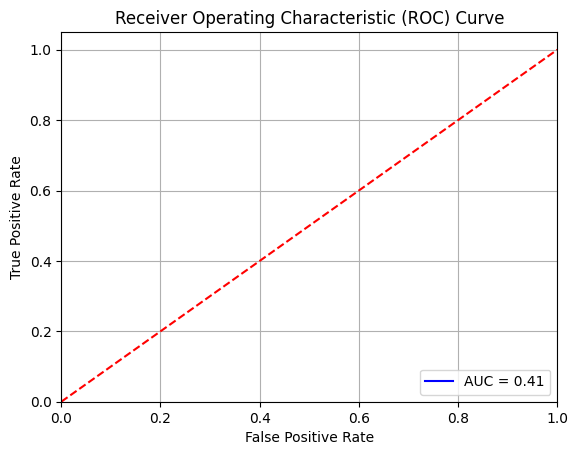

In [23]:
fp = performance.evalFP(
    y_pred=mushrooms_y_pred_knn, 
    y_test=mushModels.y_test, 
    trueLabel=1);
tn = performance.evalTN(
    y_pred=mushrooms_y_pred_knn, 
    y_test=mushModels.y_test, 
    trueClass=1);
tp = performance.evalTP(
    y_pred=mushrooms_y_pred_knn, 
    y_test=mushModels.y_test, 
    trueLabel=1);
fn = performance.evalFN(
    y_pred=mushrooms_y_pred_knn, 
    y_test=mushModels.y_test, 
    trueLabel=1);
actualNeg = fp + tn;
actualPos = tp + fn;
fpr = fp / actualNeg;
tpr = tp / actualPos;
actualNeg = performance.evalFP
performance.plotROC(
    fpr=fpr,
    tpr=tpr,
    y_test=mushModels.y_test,
    y_prob_scores=mushModels.knn_clf.predict_proba(mushModels.X_test)[:, 1]
)